## HW5 -Solutions

### Columbia Uni:yg2499

#### Run under python3.x version
    
The focus of the exercise is to build a model to predict the age of Twitter users based only on the information 
obtained from his/her profile and Twitter network.  Use the following age bands (18-24, 25-34, 35-44, 45-54, 55-54, 65+). 
You are also welcome (and encouraged) to explore the data setPreview the documentView in a new window and find 2-3 
additional insights that may be meaningful or interesting.

Training and Test Data:

user_ages_train.csv: The training data, indicating the known age for each user ID in the set.(80% training data,and 20% hold-on data)


User Data:

user_age_profiles.json: Twitter user profiles corresponding to the users in the training and test sets. The data format is documented here.

user_age_tweets.json: Recent tweets from the users in the training and test sets. The data format is documented here.
    
Friend Data:

friends.csv: A data set indicating users that the users in the training/test set are following.

friend_profiles.json: Twitter user profiles corresponding to the users in friends.csv. The data format is documented here.

Students must perform their work in Python.
Students must provide the age predictions for the cases in the user_ages_test.csv file. Please provide a csv file with each line containing a single “ID, age_prediction” pair. Please name this file age_predictions.csv.
Please submit the link to your github repo

### Preprocessing engine for at least 2 json files (not including the id to age)  50 points

In [4]:
import json
import csv
import pandas as pd
from pandas.io.json import json_normalize
import re
import nltk
from nltk.corpus import stopwords,wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit,StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,hamming_loss
import matplotlib.pyplot as plt
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

In [6]:
#thepath ='/Users/gyang/Desktop/ProjectDataScience/HW/HW5/hw5data'

df =pd.read_json('/Users/gyang/Desktop/ProjectDataScience/HW/HW5/hw5data/user_age_tweets.json')
df_o =pd.read_json('/Users/gyang/Desktop/ProjectDataScience/HW/HW5/hw5data/user_age_profiles.json')

In [7]:
pd.set_option('display.max_columns',None)
df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,metadata,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,None,2014-09-26 05:55:45,"{'hashtags': [], 'urls': [], 'symbols': [], 'u...",0,False,None,515379174454747136,515379174454747136,None,NaN,NaN,NaN,NaN,en,"{'result_type': 'recent', 'iso_language_code':...",None,NaN,7,False,"{'in_reply_to_status_id': None, 'coordinates':...","<a href=""http://twitter.com/download/iphone"" r...",RT @AlenaBacalia: i over think and second gues...,False,"{'follow_request_sent': False, 'profile_image_..."
1,NaN,None,2014-09-26 05:58:17,"{'hashtags': [], 'urls': [], 'symbols': [], 'u...",0,False,None,515379813670854656,515379813670854656,None,NaN,NaN,NaN,NaN,en,"{'result_type': 'recent', 'iso_language_code':...",None,NaN,80,False,"{'in_reply_to_status_id': None, 'coordinates':...","<a href=""http://twitter.com/download/iphone"" r...",RT @hfholden34: I've wasted too much time on t...,False,"{'follow_request_sent': False, 'profile_image_..."
2,NaN,None,2014-09-26 05:59:47,"{'hashtags': [], 'urls': [], 'symbols': [], 'u...",1,False,None,515380190361288704,515380190361288704,None,NaN,NaN,NaN,NaN,en,"{'result_type': 'recent', 'iso_language_code':...",None,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already gone.,False,"{'follow_request_sent': False, 'profile_image_..."
3,NaN,None,2014-09-26 06:00:07,"{'hashtags': [], 'urls': [], 'symbols': [], 'u...",1,False,None,515380273005854721,515380273005854720,None,NaN,NaN,NaN,NaN,en,"{'result_type': 'recent', 'iso_language_code':...",None,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already something to someone that I don't ...,False,"{'follow_request_sent': False, 'profile_image_..."
4,NaN,None,2014-09-26 08:09:57,"{'hashtags': [], 'urls': [], 'symbols': [], 'u...",1,False,None,515412946608852992,515412946608852992,None,NaN,NaN,NaN,NaN,en,"{'result_type': 'recent', 'iso_language_code':...",None,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...","I don't know what I'm doing with my life, but ...",False,"{'follow_request_sent': False, 'profile_image_..."


In [8]:
df_o.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified
0,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{'description': {'urls': []}},7931,False,274,False,264,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{'retweeted_status': {'retweet_count': 452, 'c...",12230,Atlantic Time (Canada),None,-10800.0,False
1,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{'description': {'urls': []}},1141,False,481,False,527,True,490791079,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{'retweet_count': 0, 'created_at': 'Fri Sep 26...",14680,Hawaii,None,-36000.0,False
2,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{'description': {'urls': []}},174,False,878,False,953,False,264416315,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{'retweeted_status': {'retweet_count': 2614, '...",22857,Hawaii,None,-36000.0,False
3,False,2009-12-17 20:08:55,False,False,NEVER care about what a person says that doesn...,{'description': {'urls': []}},303,False,742,False,701,False,97515432,97515432,False,False,en,30,•Carolina South• 843•,. keeleesha,False,131516,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,NaN,http://pbs.twimg.com/profile_images/4939742059...,https://pbs.twimg.com/profile_images/493974205...,009999,FFFFFF,EFEFEF,333333,True,False,Keeleesha,"{'retweet_count': 0, 'entities': {'urls': [], ...",71654,Eastern Time (US & Canada),None,-14400.0,False
4,False,2011-03-24 21:14:53,False,False,these niggas some haters & i made myself so ea...,{'description': {'urls': []}},52,False,729,False,688,False,271608323,271608323,False,False,en,0,Seven•five•Seven,killakee :),False,0A0A0A,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/27160832...,http://pbs.twimg.com/profile_images/4627093362...,https://pbs.twimg.com/profile_images/462709336...,D62D0F,000000,000000,A3A3A3,True,False,KeeLashawn_,"{'retweet_count': 0, 'entities': {'urls': [{'e...",48452,Eastern Time (US & Canada),None,-14400.0,False


In [9]:
df2 =df[['user','text']]

In [10]:
df_o2 =df_o[['id','description']]
df_o2 = df_o2.rename(columns={'id': 'ID'})

In [11]:
pd.set_option('display.max_columns',None)
df2.head()

,user,text
0,"{'follow_request_sent': False, 'profile_image_...",RT @AlenaBacalia: i over think and second gues...
1,"{'follow_request_sent': False, 'profile_image_...",RT @hfholden34: I've wasted too much time on t...
2,"{'follow_request_sent': False, 'profile_image_...",I'm already gone.
3,"{'follow_request_sent': False, 'profile_image_...",I'm already something to someone that I don't ...
4,"{'follow_request_sent': False, 'profile_image_...","I don't know what I'm doing with my life, but ..."


In [12]:
df_o2.head()

,ID,description
0,612815277,You'll never find another one like me.
1,490791079,"If you like me, i probably like you more. {IG:..."
2,264416315,Success doesn’t come to you…you go to it.
3,97515432,NEVER care about what a person says that doesn...
4,271608323,these niggas some haters & i made myself so ea...


In [13]:
df2.shape

(28138, 2)

In [14]:
df_o2.shape

(2410, 2)

In [15]:
df2['ID'] =df2['user'].apply(lambda x: x['id'])

/Users/gyang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df2.head()

,user,text,ID
0,"{'follow_request_sent': False, 'profile_image_...",RT @AlenaBacalia: i over think and second gues...,612815277
1,"{'follow_request_sent': False, 'profile_image_...",RT @hfholden34: I've wasted too much time on t...,612815277
2,"{'follow_request_sent': False, 'profile_image_...",I'm already gone.,612815277
3,"{'follow_request_sent': False, 'profile_image_...",I'm already something to someone that I don't ...,612815277
4,"{'follow_request_sent': False, 'profile_image_...","I don't know what I'm doing with my life, but ...",612815277


In [17]:
df3 =df2[['ID','text']]

In [18]:
df3.head()

,ID,text
0,612815277,RT @AlenaBacalia: i over think and second gues...
1,612815277,RT @hfholden34: I've wasted too much time on t...
2,612815277,I'm already gone.
3,612815277,I'm already something to someone that I don't ...
4,612815277,"I don't know what I'm doing with my life, but ..."


In [19]:
df3.shape

(28138, 2)

### Data Cleansing - 20 points

In [20]:
df4 =pd.DataFrame({'words':df3.groupby('ID')['text'].apply(','.join)}).reset_index()

In [21]:
df4.head()

,ID,words
0,2025381,@Eukadanz Target gift card or Amazon egift car...
1,14367721,After three weeks I once again hear Dutch peop...
2,14463854,"What up, Oakland?,Where are the best lox in SF..."
3,14691071,RT @SeattleCoffey: @lindseyhauschka - Get the ...
4,15175682,"@JAY_LOVE012 😘😘😘,@IndiaAlmighty thank you babe..."


In [22]:
df4.shape

(2195, 2)

In [23]:
#read USER_AGES csv file
user_ages =pd.read_csv('/Users/gyang/Desktop/ProjectDataScience/HW/HW5/hw5data/user_ages.csv')
user_ages.head()

,ID,Age
0,23605717,21
1,781084760,19
2,102262916,21
3,413710015,21
4,584304916,90


In [24]:
user_ages.shape

(1711, 2)

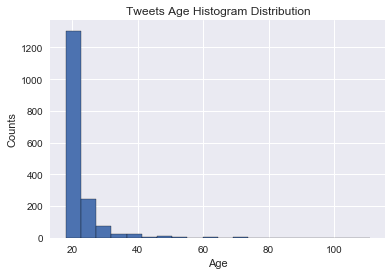

In [62]:
sns.set()
_ =plt.hist(user_ages['Age'],edgecolor='black',bins =20)
_ =plt.xlabel('Age')
_ =plt.ylabel('Counts')
_ =plt.title('Tweets Age Histogram Distribution')
plt.show()

In [26]:
#merge dataset
total_0 =pd.merge(user_ages, df4, on='ID', how='left')

In [27]:
total_1 =pd.merge(total_0,df_o2,on='ID', how='left')

In [28]:
total_1.shape

(1711, 4)

In [29]:
#combine words and description column into --> texts column
total_1['texts'] = total_1.words.str.cat(total_1.description)

In [30]:
total_1.head()

,ID,Age,words,description,texts
0,23605717,21,RT @studentNT: @leannesiekiera Me too! I'm chi...,Mom and Wife / 3rd year stn. Adult branch edit...,RT @studentNT: @leannesiekiera Me too! I'm chi...
1,781084760,19,"@fallonperl I miss you too Fallon! Thanks!,RT ...",6'9 F for the University of Illinois-Chicago. ...,"@fallonperl I miss you too Fallon! Thanks!,RT ..."
2,102262916,21,"On another note, I need to dye my hair.,Andrew...","Detonate together, collapse together, and melt...","On another note, I need to dye my hair.,Andrew..."
3,413710015,21,I really have the sweetest boyfriend. He is tr...,,I really have the sweetest boyfriend. He is tr...
4,584304916,90,"If I stay ruined my life,RT @OTHdiary: ""The wo...",mhs varsity cheerleader ☻,"If I stay ruined my life,RT @OTHdiary: ""The wo..."


In [31]:
total =total_1[['ID','Age','texts']]

### Transform data and Train a model - 20 points

In [32]:
total2 =total.copy()

In [33]:
total2.head()

,ID,Age,texts
0,23605717,21,RT @studentNT: @leannesiekiera Me too! I'm chi...
1,781084760,19,"@fallonperl I miss you too Fallon! Thanks!,RT ..."
2,102262916,21,"On another note, I need to dye my hair.,Andrew..."
3,413710015,21,I really have the sweetest boyfriend. He is tr...
4,584304916,90,"If I stay ruined my life,RT @OTHdiary: ""The wo..."


In [34]:
type(total2['texts'])

pandas.core.series.Series

In [35]:
total2['texts'] =total2['texts'].apply(lambda x: str(x).lower()) #lower case
total2['texts'] =total2['texts'].replace(r'http\S+', '', regex=True) #remove URLs
total2['texts'] =total2['texts'].map(lambda x: re.sub(r'[^a-zA-Z]+', ' ',x)) #remove special characters
total2['texts'] =total2['texts'].replace(r'\b\w\b','').str.replace(r'\s+', ' ') #remove single letter

In [36]:
stop = set(stopwords.words('english'))

In [37]:
#remove stopwords
total2['tweet_without_stopwords'] = total2['texts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [38]:
#remove RT
total2['tweet_without_stopwords'] =total2['tweet_without_stopwords'].str.replace(r'rt','')

In [39]:
total2.head()

,ID,Age,texts,tweet_without_stopwords
0,23605717,21,rt studentnt leannesiekiera me too i m child b...,studentnt leannesiekiera child branch one fir...
1,781084760,19,fallonperl i miss you too fallon thanks rt de...,fallonperl miss fallon thanks deucce happy gl...
2,102262916,21,on another note i need to dye my hair andrew a...,another note need dye hair andrew true love wa...
3,413710015,21,i really have the sweetest boyfriend he is tru...,really sweetest boyfriend truly wonderful watc...
4,584304916,90,if i stay ruined my life rt othdiary the world...,stay ruined life othdiary world full magic be...


In [40]:
# create ageband:

def ageband(x):
    if x in range(18,25):
        return 'A'
    elif x in range(25,35):
        return 'B'
    elif x in range(35,45):
        return 'C'
    elif x in range(45,55):
        return 'D'
    elif x in range(55,65):
        return 'E'
    elif x >= 65:
        return 'F'

In [41]:
total2['ageband'] =total2['Age'].apply(lambda x :ageband(x))

In [42]:
total2.head(10)

,ID,Age,texts,tweet_without_stopwords,ageband
0,23605717,21,rt studentnt leannesiekiera me too i m child b...,studentnt leannesiekiera child branch one fir...,A
1,781084760,19,fallonperl i miss you too fallon thanks rt de...,fallonperl miss fallon thanks deucce happy gl...,A
2,102262916,21,on another note i need to dye my hair andrew a...,another note need dye hair andrew true love wa...,A
3,413710015,21,i really have the sweetest boyfriend he is tru...,really sweetest boyfriend truly wonderful watc...,A
4,584304916,90,if i stay ruined my life rt othdiary the world...,stay ruined life othdiary world full magic be...,F
5,546358433,19,rt diaryforteens boys need to understand this ...,diaryfoeens boys need understand caption tho ...,A
6,107138411,21,these bitches have nothing on bitches in cali ...,bitches nothing bitches cali nigga never seen ...,A
7,722121962,20,awes la thank you love you too why does every...,awes la thank love everybody annoying get welp...,A
8,88324161,21,nan,nan,A
9,116306471,24,it s about that time nolenation fearthespear f...,time nolenation feahespear floridastate cowboy...,A


In [43]:
total3 =total2[['ID','Age','ageband','tweet_without_stopwords']]

In [44]:
#total3.set_index('ID', inplace=True)

In [45]:
total3.head(10)

,ID,Age,ageband,tweet_without_stopwords
0,23605717,21,A,studentnt leannesiekiera child branch one fir...
1,781084760,19,A,fallonperl miss fallon thanks deucce happy gl...
2,102262916,21,A,another note need dye hair andrew true love wa...
3,413710015,21,A,really sweetest boyfriend truly wonderful watc...
4,584304916,90,F,stay ruined life othdiary world full magic be...
5,546358433,19,A,diaryfoeens boys need understand caption tho ...
6,107138411,21,A,bitches nothing bitches cali nigga never seen ...
7,722121962,20,A,awes la thank love everybody annoying get welp...
8,88324161,21,A,nan
9,116306471,24,A,time nolenation feahespear floridastate cowboy...


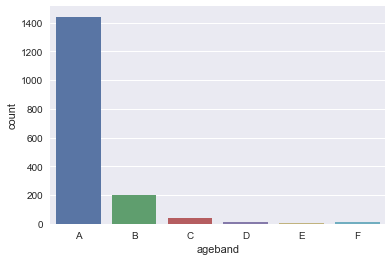

In [61]:
sns.countplot(x="ageband", data=total3,order=['A','B','C','D','E','F'])
#plt.xticks(rotation=45)

In [46]:
#split 80% training data and 20% holdout data
train ,test = train_test_split(total3,test_size=0.2) 

In [47]:
train.shape

(1368, 4)

In [48]:
test.shape

(343, 4)

In [49]:
train_text =list(train['tweet_without_stopwords'])

In [50]:
train_target =train['ageband'].values

In [51]:
text_clfPipe = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('feat-sel',  SelectFromModel(LinearSVC())),
                      ('clf-rf', RandomForestClassifier(max_depth=2, random_state=0)),
])

In [52]:
text_clf = text_clfPipe.fit(train_text,train_target )

In [53]:
#scores = cross_validation.cross_val_score(text_clfPipe, train_text,train_target, cv=10)

In [54]:
#scores.mean()

### Classify arbitrary text for specific industry - 10 points

In [55]:
test_text =list(test['tweet_without_stopwords'])

In [56]:
predicted = text_clf.predict(test_text)

In [57]:
accuracy_score(test['ageband'].values, predicted)

0.88338192419825068

In [58]:
#prediction = pd.DataFrame(predicted, columns=['age_prediction']).to_csv('prediction.csv')

In [59]:
user_id =test['ID'].values

In [65]:
#save predicted column as CSV file
prediction =pd.DataFrame({'ID': user_id ,'age_prediction':predicted}).to_csv('age_predictions.csv',index = False)